# Actividad 3

\<Jaime Gabriel Vegas\>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


Aquí tienes una demostración de intento de clasifiación del conjunto de datos [CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10) con una red neuronal convencional. Leélo, observando especialmente los comentarios.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=x_train.shape[1:]), # Extraemos el tamaño directamente de los ejemplos
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') # Incluimos aquí la función softmax para que la salida directamente dé probabilidades
    # otras opciones posibles son añadir una capa Softmax al final o modificar la función de pérdida para que asuma que viene de "logits" (valores de activación)
])

2024-02-29 10:50:41.442000: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# Observa el número de parámetros ajustables que tiene esta red
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Como las etiquetas están codificadas con números (no one-hot encoding), usamos esta función de pérdida, que lo tiene en cuenta
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0375 - accuracy: 0.2348 - val_loss: 1.9865 - val_accuracy: 0.2604
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9605 - accuracy: 0.2656 - val_loss: 1.8714 - val_accuracy: 0.3020
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9466 - accuracy: 0.2737 - val_loss: 1.8995 - val_accuracy: 0.3055
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9388 - accuracy: 0.2778 - val_loss: 1.8442 - val_accuracy: 0.3235
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9324 - accuracy: 0.2819 - val_loss: 1.8384 - val_accuracy: 0.3300


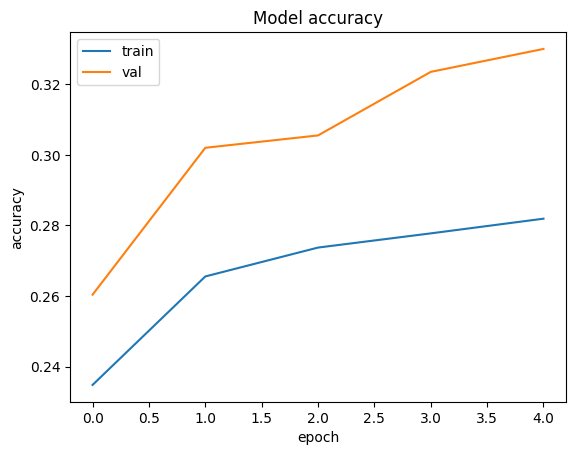

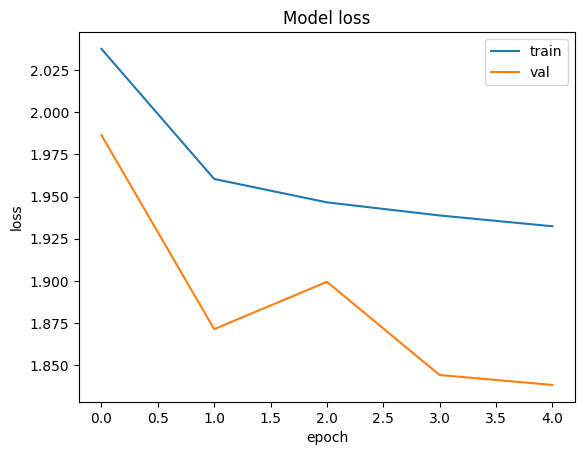

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## CNN

En esta sección tienes que utilizar tú una red neuronal convolucional que resuelta este mismo problema.
Puedes comparar con el [tutorial](https://www.tensorflow.org/tutorials/images/cnn) de tensorflow que estudia este mismo problema, aunque revisa con cuidado cómo se construye el proceso de minimización, recordando las observaciones que había antes en los cometarios.

Al final, **incluye un breve comentario** comparando los **resultados** de los dos modelos y el **número de parámetros ajustables** que tienen.

La principal diferencia con el modelo de la documentación es que la red empleado arriba aplana la entrada desde el principio, lo que parece que nos hace perder información.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

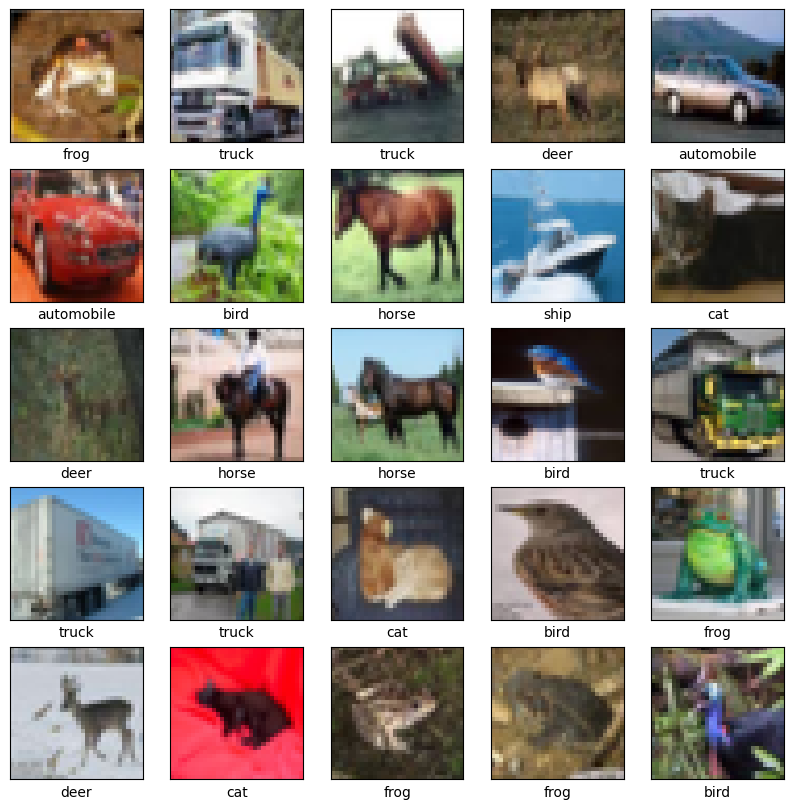

In [ ]:
# Pintamos algunas imágenes (celda extraída del tutotorial)

import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
contador = 0
for i in range(25):

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Contruimos ahora el nuevo modelo

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Añadimos una red convolucional de dos dimensiones para que
                                                                            # no se pierda la información que la estructura bidimensional pueda aportar.
                                                                            # También añadimos la función de activación para añadir no linealidad
    layers.MaxPooling2D((2, 2)), # Disminuye la dimensión de los datos, en este caso tomando el mayor de los valores en cada recuadro 2x2
    layers.Conv2D(64, (3, 3), activation='relu'), # Repetimos estos dos últimos pasos. Como nuestro datos tienen cada vez una dimensión menor, podemos
                                                  # más matrices de convolución. Ponemos 64 por ser el valor que está en el tutorial
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(), # Convertimos las salidas en un vector unidimensional
    layers.Dense(64, activation='relu'),  # Añadimos un par de capas densas más. La última tiene que ser con el mismo número de neuronas que salidas tengamos
    layers.Dropout(0.2),
    layers.Dense(10)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
# Compilamos y entrenamos el modelo

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Como no hemos puesto la función 'softmax' en la última capa de la red neuronal,
                                                                                    # tenemos que poner el parámetro from_logits=True. Esto hace que la función de pérdida
                                                                                    # sepa que los valores de salida de la red neuronal no son probabilidades.
                                                                                    # Además, parece que ayuda a la estabilidad numérica del sistema (https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss)
                                                                                    # Curiosamente ocurre un problema similar al que se explica en el enlace anterior.
                                                                                    # No poner la función softmax y luego poner from_logits=False da un resultado notablemente peor
                                                                                    # que hacerlo de la forma en la que está ahora mismo.
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5969 - accuracy: 0.4145 - val_loss: 1.3016 - val_accuracy: 0.5329
Epoch 2/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2180 - accuracy: 0.5652 - val_loss: 1.0828 - val_accuracy: 0.6128
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0626 - accuracy: 0.6264 - val_loss: 1.0459 - val_accuracy: 0.6320
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9668 - accuracy: 0.6592 - val_loss: 0.9212 - val_accuracy: 0.6750
Epoch 5/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9026 - accuracy: 0.6829 - val_loss: 0.9275 - val_accuracy: 0.6783


In [ ]:
model2.evaluate(x_test, y_test, verbose=2)


313/313 - 2s - loss: 0.9275 - accuracy: 0.6783 - 2s/epoch - 7ms/step


[0.9275280237197876, 0.6783000230789185]

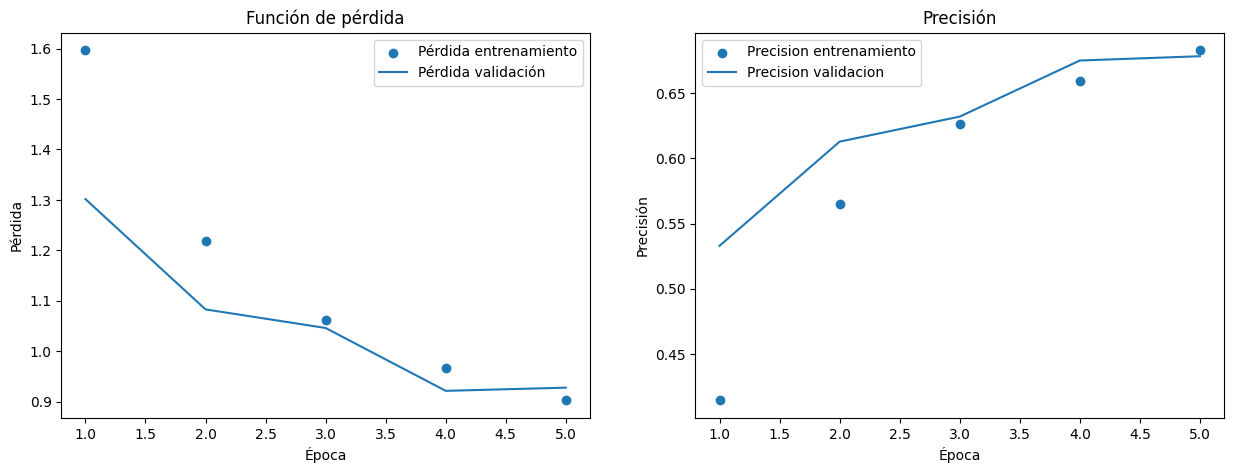

In [ ]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()

plt.show()

Obtenemos unos resultados notablemente mejores que para el primero modelo, con alrededor de un 70% de precisión (depende de la ejecución. En algunos casos se llega a más, en otros a menos). Además, observando la tendencia parece claro que la precisión seguiría subiendo si el entrenamiento durara más tiempo. Lo hemos hecho durante 5 épocas para poder comparar con el modelo anterior, que también se entrenó durante ese tiempo.

Podemos implementar alguna característica nueva para tratar de mejorar los resultados.

In [ ]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),                  # Añadimos un par de capas extra
    layers.Dense(32, activation='relu'),  #
    layers.Dropout(0.2),
    layers.Dense(10)
])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
# Compilamos y entrenamos el modelo

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model3.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7012 - accuracy: 0.3708 - val_loss: 1.3351 - val_accuracy: 0.5239
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3590 - accuracy: 0.5188 - val_loss: 1.1648 - val_accuracy: 0.5801
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2146 - accuracy: 0.5740 - val_loss: 1.0768 - val_accuracy: 0.6221
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1185 - accuracy: 0.6137 - val_loss: 1.0213 - val_accuracy: 0.6428
Epoch 5/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0427 - accuracy: 0.6417 - val_loss: 0.9778 - val_accuracy: 0.6594


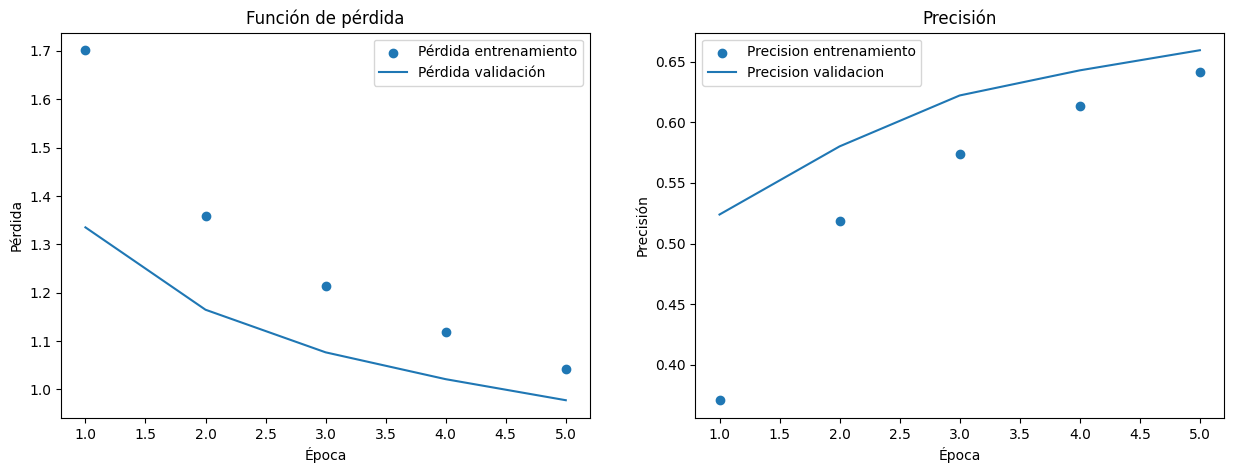

In [ ]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()

plt.show()

Probamos ahora a meter alguna matriz más grande de convolución

In [ ]:
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), # Cambiamos a una matriz de 128 elementos
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 2048)             

In [ ]:
# Compilamos y entrenamos el modelo

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model4.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6210 - accuracy: 0.4034 - val_loss: 1.2380 - val_accuracy: 0.5518
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2321 - accuracy: 0.5630 - val_loss: 1.0739 - val_accuracy: 0.6185
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0695 - accuracy: 0.6260 - val_loss: 1.0183 - val_accuracy: 0.6414
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9646 - accuracy: 0.6620 - val_loss: 0.9205 - val_accuracy: 0.6782
Epoch 5/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8895 - accuracy: 0.6885 - val_loss: 0.8559 - val_accuracy: 0.6992


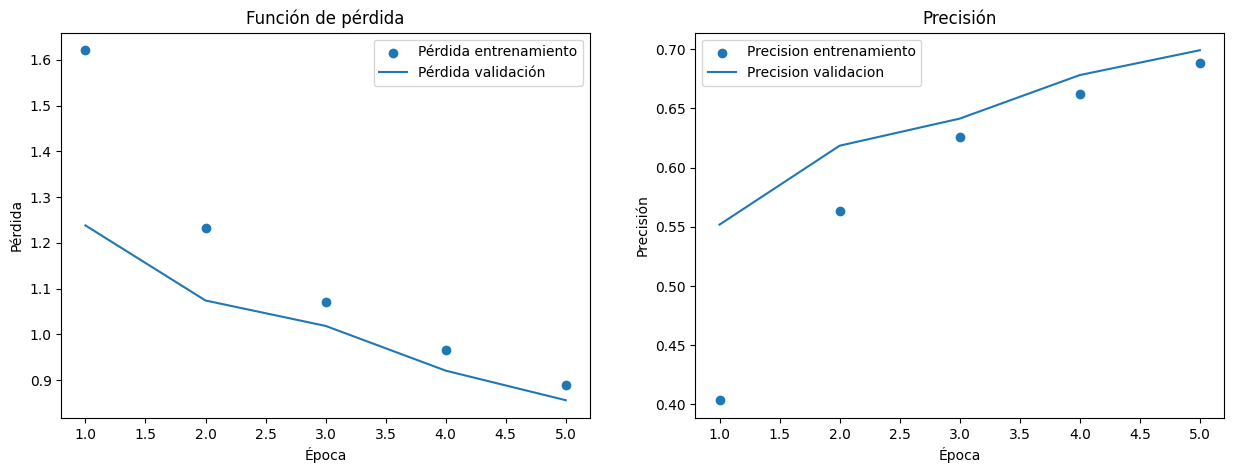

In [ ]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()


Obtenemos esencialmente el mismo resultado que con el modelo dos pero tandado un poco maás.

Probamos a entrenar el modelo original por más tiempo.

In [ ]:
# Contruimos de nuevo el modelo2. Repetimos el proceso para que se borre lo que ya hemos hecho

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

In [ ]:
# Compilamos y entrenamos el modelo

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Como no hemos puesto la función 'softmax' en la última capa de la red neuronal,
                                                                                    # tenemos que poner el parámetro from_logits=True. Esto hace que la función de pérdida
                                                                                    # sepa que los valores de salida de la red neuronal no son probabilidades.
                                                                                    # Además, parece que ayuda a la estabilidad numérica del sistema (https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss)
                                                                                    # Curiosamente ocurre un problema similar al que se explica en el enlace anterior.
                                                                                    # No poner la función softmax y luego poner from_logits=False da un resultado notablemente peor
                                                                                    # que hacerlo de la forma en la que está ahora mismo.
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5928 - accuracy: 0.4146 - val_loss: 1.3092 - val_accuracy: 0.5246
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2478 - accuracy: 0.5540 - val_loss: 1.1166 - val_accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0969 - accuracy: 0.6134 - val_loss: 0.9870 - val_accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0011 - accuracy: 0.6462 - val_loss: 0.9704 - val_accuracy: 0.6588
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9257 - accuracy: 0.6736 - val_loss: 0.9850 - val_accuracy: 0.6528
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8771 - accuracy: 0.6908 - val_loss: 0.9106 - val_accuracy: 0.6872
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8297 - accuracy: 0.7104 - val_loss: 0.8897 -

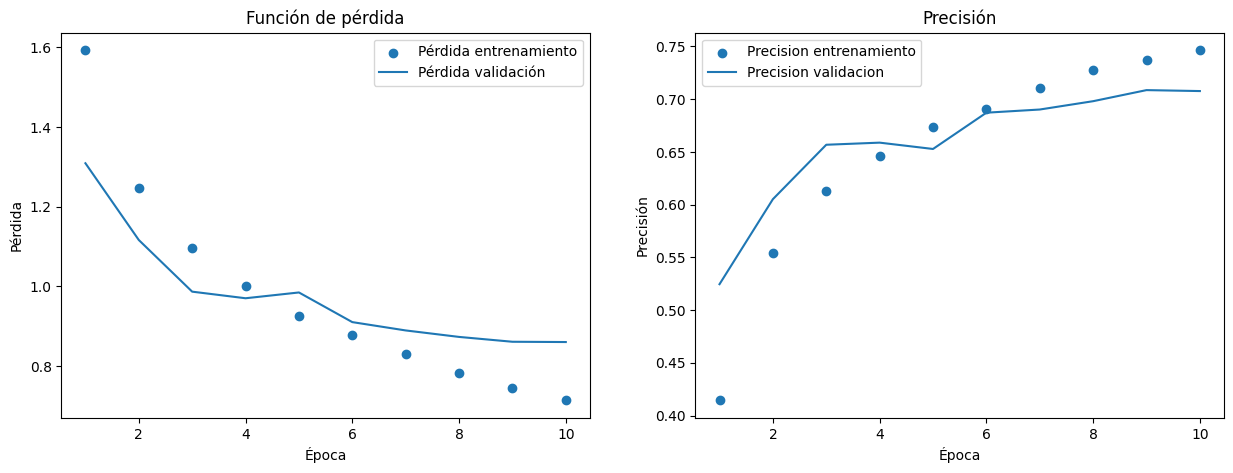

In [ ]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()

plt.show()

Vemos que el resultado también muy similar en cuento precisión. Mirando al gráfico, sin embargo, vemos que la precisión en el conjunto de validación va creciendo cada vez menos hasta volverse casi plana. Esto parece indicar que por mucho más entrenamiento que hagamos no vamos a lograr mejores resultados.


Teniendo en cuenta todos los casos que hemos ido realizando, en los que la precisión no ha ido aumentando pese a cambiar algunos parámetros del modelo, parece que lo que tenemos que hacer para mejorar la precisión es buscar una estructura nueva, más que añadir pequeños cambios a la que ya tenemos.

----
Como conclusión, observamos que la principal característica entre el primer y el segundo modelo es el uso de la capa convolucional bidimensional, Conv2D, y el uso del MaxPooling.

En el primer modelo no estamos considerando la estructura bidimensional de las imágenes, o al menos no estamos considreando gran parte de la información que ésta nos puede aportar. Con la nueva arquitectura, más natural para el formato de datos empleado, parece que el modelo puede entender más patrones de los datos.